Random Forest R2 Score: 0.9469390912019764
XGBoost R2 Score: 0.3788455685392611


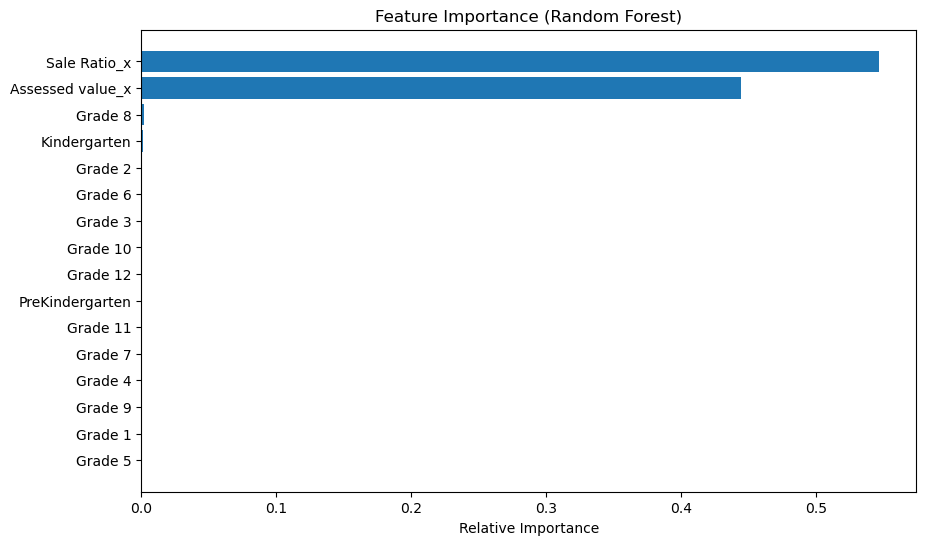

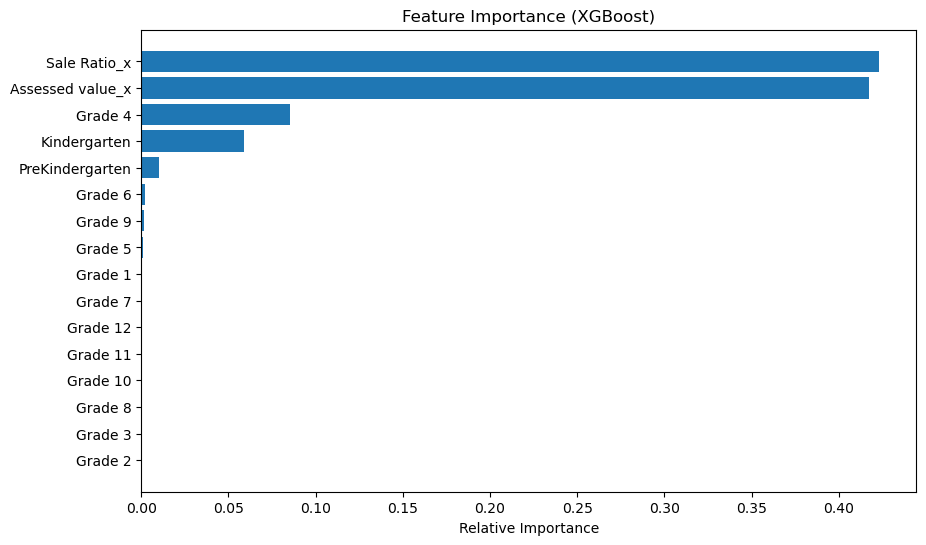

In [30]:
# Optimized code for running best-suited models (Random Forest and XGBoost)

# 1. Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load your datasets
main_data = pd.read_csv("Maindata_cleaned.csv", on_bad_lines='skip')
housing_data = pd.read_csv("Housing Sales Data.csv", low_memory=False)
schools_data = pd.read_csv("Schoolsdata_cleaned.csv")

# 3. Pre-clean and align columns
main_data["Town"] = main_data["Town"].str.strip()
housing_data["Town"] = housing_data["Town"].str.strip()
schools_data["Town"] = schools_data["Town"].str.strip()

# Rename 'Open Year' to 'List Year' in schools data
schools_data = schools_data.rename(columns={"Open Year": "List Year"})

# Ensure 'List Year' columns are strings
main_data["List Year"] = main_data["List Year"].astype(str)
housing_data["List Year"] = housing_data["List Year"].astype(str)
schools_data["List Year"] = schools_data["List Year"].astype(str)

# 4. Merge datasets
data = main_data.merge(housing_data, on=["Town", "List Year"], how="left")
data = data.merge(schools_data, on=["Town", "List Year"], how="left")

# 5. Data Preprocessing
data = data.dropna(subset=["Sale Amount_x"])

# Select features
features = [
    "Assessed value_x", "Sale Ratio_x", 
    "PreKindergarten", "Kindergarten", "Grade 1", "Grade 2", 
    "Grade 3", "Grade 4", "Grade 5", "Grade 6", 
    "Grade 7", "Grade 8", "Grade 9", "Grade 10", 
    "Grade 11", "Grade 12"
]

X = data[features]
y = data["Sale Amount_x"]

# 6. Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Random Forest Regressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# 8. XGBoost Regressor
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xg_reg.fit(X_train, y_train)
y_pred_xgb = xg_reg.predict(X_test)

# 9. Evaluate Models
print("Random Forest R2 Score:", r2_score(y_test, y_pred_rf))
print("XGBoost R2 Score:", r2_score(y_test, y_pred_xgb))

# 10. Feature Importance (Random Forest)
importances_rf = rf.feature_importances_
indices_rf = np.argsort(importances_rf)

plt.figure(figsize=(10,6))
plt.title('Feature Importance (Random Forest)')
plt.barh(range(len(indices_rf)), importances_rf[indices_rf], align='center')
plt.yticks(range(len(indices_rf)), [features[i] for i in indices_rf])
plt.xlabel('Relative Importance')
plt.show()

# 11. Feature Importance (XGBoost)
importances_xgb = xg_reg.feature_importances_
indices_xgb = np.argsort(importances_xgb)

plt.figure(figsize=(10,6))
plt.title('Feature Importance (XGBoost)')
plt.barh(range(len(indices_xgb)), importances_xgb[indices_xgb], align='center')
plt.yticks(range(len(indices_xgb)), [features[i] for i in indices_xgb])
plt.xlabel('Relative Importance')
plt.show()


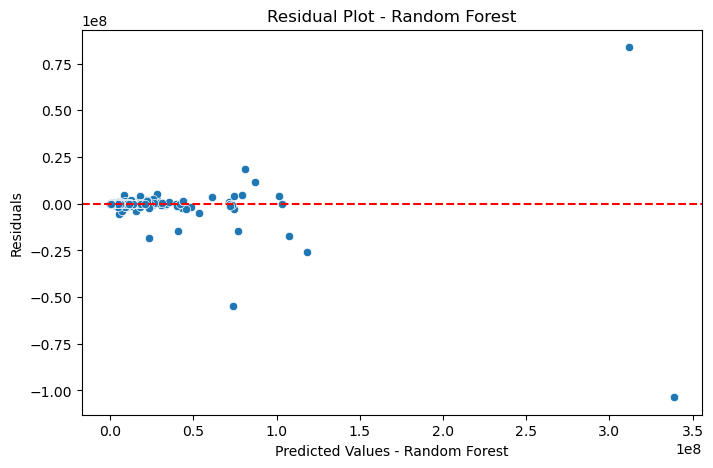

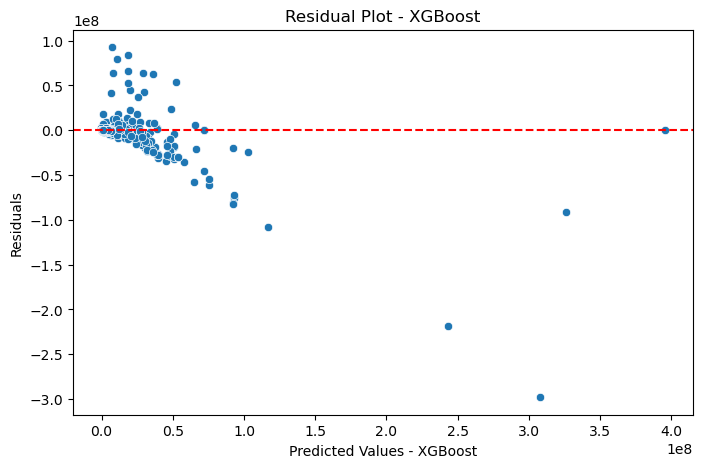

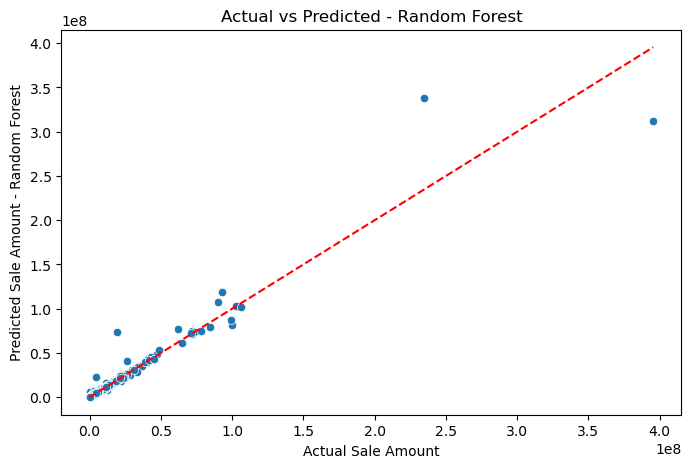

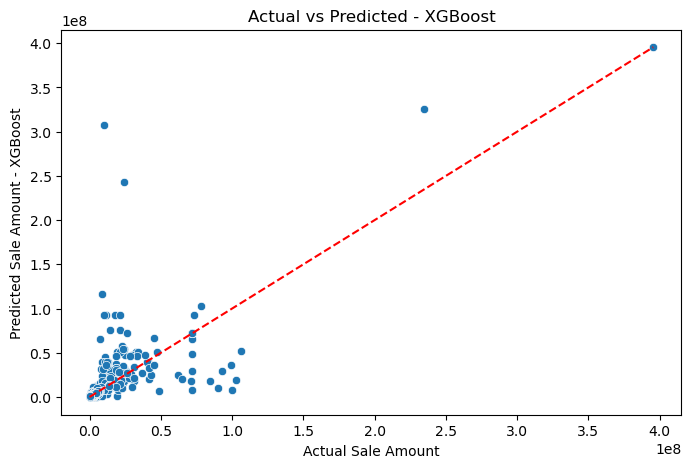

In [32]:
# 14. Residual plots for Regression Evaluation

# Random Forest Residuals
residuals_rf = y_test - y_pred_rf
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_pred_rf, y=residuals_rf)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values - Random Forest')
plt.ylabel('Residuals')
plt.title('Residual Plot - Random Forest')
plt.show()

# XGBoost Residuals
residuals_xgb = y_test - y_pred_xgb
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_pred_xgb, y=residuals_xgb)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values - XGBoost')
plt.ylabel('Residuals')
plt.title('Residual Plot - XGBoost')
plt.show()

# 15. Prediction vs Actual Plots

# Random Forest Prediction vs Actual
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Sale Amount')
plt.ylabel('Predicted Sale Amount - Random Forest')
plt.title('Actual vs Predicted - Random Forest')
plt.show()

# XGBoost Prediction vs Actual
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred_xgb)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Sale Amount')
plt.ylabel('Predicted Sale Amount - XGBoost')
plt.title('Actual vs Predicted - XGBoost')
plt.show()


In [36]:
# 9. Evaluate Models
r2_rf = r2_score(y_test, y_pred_rf)
r2_xgb = r2_score(y_test, y_pred_xgb)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

print(f"Random Forest - R2: {r2_rf:.4f}, RMSE: {rmse_rf:.2f}")
print(f"XGBoost - R2: {r2_xgb:.4f}, RMSE: {rmse_xgb:.2f}")
# 10. Create Results Table
results_table = pd.DataFrame({
    "Model": ["Random Forest", "XGBoost"],
    "R2 Score": [round(r2_rf, 4), round(r2_xgb, 4)],
    "RMSE": [round(rmse_rf, 2), round(rmse_xgb, 2)]
})

Random Forest - R2: 0.9469, RMSE: 499925.10
XGBoost - R2: 0.3788, RMSE: 1710477.60
